# THESLEENA.P



# **ML** **PROJECT-DSML**

---



## *MOBILE HEALTH HUMAN BEHAVIOR*

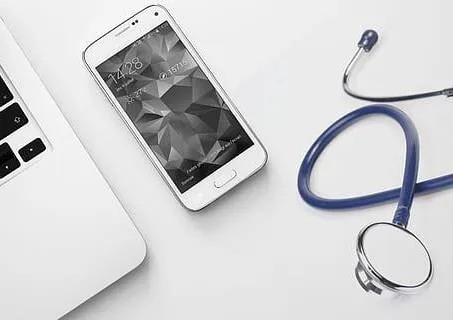

## INTRODUCTION

Mobile health human behavior,is a term that describes the fastly developing field of digital health providing care and treatment for the population via mobile technology such as smart devices.Human behavior is diverse and complex,this nature has posed a great challenge on learning,and most importantly,predicting the human behavior from daily activities.



## AIMS AND OBJECTIVES



*   Derivation of data-driven insights from a mobile health human behavior data by means of appropriate visuals.
*   Building and training a machine learning model that enables the prediction of human behavior by the means of a mobile health device.



## DATASET SUMMARY



*   Activities: 12
*   Sensor devices: 3


*   Subjects: 10






The collected dataset comprises  body motion and vital signs recordings for persons of diverse profile while performing 12 physical activities.Shimmer2 [BUR10] wearable sensors were used for therecordings.The sensors were respectively placed on the chest,right wrist and left ankle and attached by using elastic straps.The use of multiple sensors permits us to measure the motion experienced by diverse body parts,namely,the acceleration,the rate of turn and the magnetic field orientation,thus better capturing the body dynamics.The sensor positioned on the chest also provides 2-lead ECG measurements,which can be potentially used for basic heart monitoring,checking for various arrhythmias or looking at the effects of exercise on the ECG.All sensing modalities are recorded at a sampling rate of 50Hz,which is considered sufficient for capturing human activity.Each session was recorded using a video camera.This dataset is found to generalize to common activities of the daily living.



---



**** Features Information *******


---


1.   alx: acceleration from the left-ankle sensor (X axis)

2.   aly: acceleration from the left-ankle sensor (Y axis)


3.   alz: acceleration from the left-ankle sensor (Z axis)

2.   glx: gyro from the left-ankle sensor (X axis)


5.   gly: gyro from the left-ankle sensor (Y axis)

2.   glz: gyro from the left-ankle sensor (Z axis)


7.   arx: acceleration from the right-lower-arm sensor (X axis)

2.   ary: acceleration from the right-lower-arm sensor (Y axis)


9.   arz: acceleration from the right-lower-arm sensor (Z axis)

2.   grx: gyro from the right-lower-arm sensor (X axis)


11.   gry: gyro from the right-lower-arm sensor (Y axis)

2.   grz: gyro from the right-lower-arm sensor (Z axis)


13.   subject: volunteer number

******.   Target Information:*****

---




14.   Activity: corresponding activity






















### ACTIVITY SET

The activity set is listed in the following:



1.   L1: Standing still (1 min)
1.   L2: Sitting and relaxing (1 min)

1.   L3: Lying down (1 min)
2.   L4: Walking (1 min)


5.   L5: Climbing stairs (1 min)



6.   L6: Waist bends forward (20x)


7.   L7: Frontal elevation of arms (20x)



8.   L8: Knees bending (crouching) (20x)


9.   L9: Cycling (1 min)



10.   L10: Jogging (1 min)

11.   L11: Running (1 min)





12.   L12: Jump front & back (20x)

 NOTE: In brackets are the number of repetitions (Nx) or the duration of the exercises (min)







PREPROCESSING

Preprocessing is cleaning and preparing data is critical in machine learning.Working with big datasets in python requires attention and effort.If not done right,it may result in flawed models and bad predictions.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

The ML projects,the right tools and libraries are crucial.They greatly improve our work and the outcomes of our projects.We use python's powerful libraries like Pandas and NumPy for cleaning and fixing our data.

*   sklearn:

---
sklearn is a top Python library for machine learning.It offers many algorithms for tasks like classification and clustering.It's easy to use and has lots of documentation.This makes sklearn great for testing different machine learning models.




*   NumPy:

---
NumPy is key for scientific computing in python.It helps with efficient numerical operations and handling large data.Other ML libraries often use Numpy,making it important for our workflow.

*   Pandas:

---
Pandas is great for data manipulation and analysis.It makes it easy to clean,transform,and explore data.With tools for handling missing data and merging datasets,pandas is crucial for machine learning.

*   Matplotlib:

---
Matplotlib let us create many visualizations.We can make line plots,scatter plots and more.

  






1.Load the dataset

In [6]:
# Load the dataset
df = pd.read_csv("mhealth_raw_data.csv")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.18490,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.38760,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.40860,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.18140,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.41730,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.32374,-9.9511,-1.04640,-0.569570,-0.75422,-0.52456,-6.5886,-10.5290,2.129800,-0.182350,-0.92813,-0.553880,0,subject9
1048571,0.40570,-10.0510,-1.11310,-0.569570,-0.75422,-0.52456,-6.0806,-10.5710,1.877700,-0.182350,-0.92813,-0.553880,0,subject9
1048572,0.48707,-10.0110,-1.09980,-0.593690,-0.75047,-0.53045,-5.3752,-10.0910,1.870400,-0.078431,-0.96509,-0.560340,0,subject9
1048573,0.41283,-9.8038,-1.17360,-0.593690,-0.75047,-0.53045,-4.6322,-9.7003,1.973300,-0.078431,-0.96509,-0.560340,0,subject9


 Now,We load the dataset with the read_csv method using Pandas.It converts into dataframe.A DataFrame is a data structure made up of rows and columns.

2.Understand the data structure

In [7]:
df.shape

(1048575, 14)

The df.shape method provides information about the number of rows and columns ina DataFrame quickly.Here,we got 1048575 rows and 14 columns.

In [8]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1048575 non-null  float64
 1   aly       1048575 non-null  float64
 2   alz       1048575 non-null  float64
 3   glx       1048575 non-null  float64
 4   gly       1048575 non-null  float64
 5   glz       1048575 non-null  float64
 6   arx       1048575 non-null  float64
 7   ary       1048575 non-null  float64
 8   arz       1048575 non-null  float64
 9   grx       1048575 non-null  float64
 10  gry       1048575 non-null  float64
 11  grz       1048575 non-null  float64
 12  Activity  1048575 non-null  int64  
 13  subject   1048575 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 112.0+ MB


In [10]:
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.481221e+00,-9.574932e+00,-8.791344e-01,-1.007315e-02,-6.135945e-01,-1.376290e-01,-3.551709e+00,-5.707373e+00,2.654840e+00,-2.750808e-01,-4.556301e-01,2.882224e-01,1.732673e+00
std,3.690661e+00,4.071565e+00,5.303325e+00,4.942075e-01,3.568763e-01,5.452972e-01,4.711360e+00,5.726784e+00,3.879341e+00,5.349013e-01,5.647479e-01,5.556644e-01,3.251485e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.567800e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.691250e-01,-1.008400e+01,-2.599400e+00,-4.471200e-01,-8.123800e-01,-5.677800e-01,-5.890450e+00,-9.364650e+00,4.175400e-01,-7.058800e-01,-8.932200e-01,-1.961200e-01,0.000000e+00
50%,1.342900e+00,-9.647600e+00,1.909100e-02,-2.968500e-02,-7.035600e-01,-1.493100e-01,-2.870500e+00,-7.380000e+00,2.218300e+00,-3.568600e-01,-6.262800e-01,3.254300e-01,0.000000e+00
75%,2.568100e+00,-9.014300e+00,1.372500e+00,4.415600e-01,-5.422100e-01,3.418500e-01,-1.030400e+00,-2.450350e+00,5.257650e+00,9.607800e-02,-8.008200e-02,7.887900e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [ ]:
# drop the 'subject' column
df = df.drop('subject',axis=1)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.18490,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.38760,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.40860,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.18140,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.41730,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.32374,-9.9511,-1.04640,-0.569570,-0.75422,-0.52456,-6.5886,-10.5290,2.129800,-0.182350,-0.92813,-0.553880,0
1048571,0.40570,-10.0510,-1.11310,-0.569570,-0.75422,-0.52456,-6.0806,-10.5710,1.877700,-0.182350,-0.92813,-0.553880,0
1048572,0.48707,-10.0110,-1.09980,-0.593690,-0.75047,-0.53045,-5.3752,-10.0910,1.870400,-0.078431,-0.96509,-0.560340,0
1048573,0.41283,-9.8038,-1.17360,-0.593690,-0.75047,-0.53045,-4.6322,-9.7003,1.973300,-0.078431,-0.96509,-0.560340,0


3.Handle missing values

In [11]:
# missing values
df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


4.Handle Duplicates

In [12]:
# checking duplicates
df.duplicated().sum()

0

<Axes: >

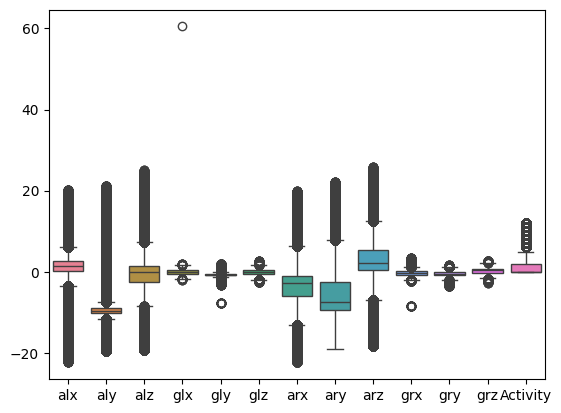

In [16]:
sns.boxplot(df)

In [21]:
# Remove the outlier all columns by using functions of IQR method
def remove_outliers(df,columns):
    df_filtered = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_whisker = Q1 - 0.5 * IQR
        upper_whisker = Q3 + 0.5 * IQR

        df_filtered = df_filtered[(df_filtered[col] <= upper_whisker) & (df_filtered[col] >= lower_whisker)]
    return df_filtered

In [22]:
df1 = remove_outliers(df,['alx','aly','alz','glx','gly','glz','arx','ary','arz','grx','gry','grz','Activity'])


<Axes: >

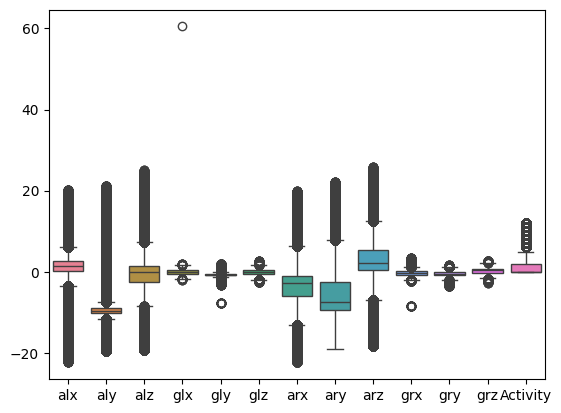

In [23]:
sns.boxplot(df)

In [ ]:
#  x=features,y=target
x = df[['alx','aly','alz','glx','gly','glz','arx','ary','arz','grx','gry','grz']]
y = df['Activity']

In [ ]:
# standard scaling the all numerical features
z = StandardScaler()
df_standard_scaled = z.fit_transform(x)
df_standard_scaled

array([[ 0.19066478, -0.02990687,  0.28470914, ..., -0.32518007,
        -0.98215538, -0.45664158],
       [ 0.24558721,  0.01643897,  0.2947255 , ..., -0.32518007,
        -0.98215538, -0.45664158],
       [ 0.25127725,  0.00184998,  0.29420508, ..., -0.32518007,
        -0.98215538, -0.45664158],
       ...,
       [-0.26936954, -0.10710081, -0.04160894, ...,  0.36763777,
        -0.90210192, -1.52711371],
       [-0.28948518, -0.05621126, -0.05552474, ...,  0.36763777,
        -0.90210192, -1.52711371],
       [-0.3223709 , -0.06822139, -0.0444185 , ...,  0.36763777,
        -0.90210192, -1.52711371]])

<Axes: ylabel='Count'>

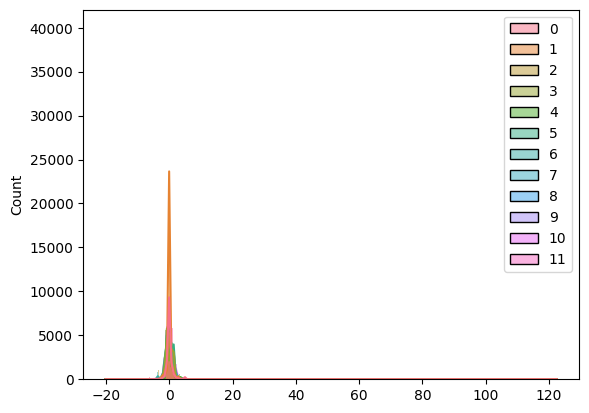

In [ ]:
# after the scaling
sns.histplot(df_standard_scaled,kde=True)

 6.Handle Outliers

In [14]:
df.skew()

TypeError: could not convert string to float: 'subject1'

In [ ]:
df1.skew()

,0
alx,-0.069051
aly,0.329416
alz,-1.008517
glx,0.198824
gly,0.293467
glz,0.097158
arx,-0.601027
ary,1.636180
arz,0.754578
grx,-0.002565


7.Split the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_standard_scaled,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(838860, 12)

In [ ]:
y_train.shape

(838860,)

In [ ]:
x_test.shape

(209715, 12)

In [ ]:
y_test.shape

(209715,)